<a href="https://colab.research.google.com/github/kapilkukreja469/Mobile_price_range_prediction/blob/main/Mobile_price_range_prediction_by_kapil_kukreja.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name    - Mobile Price Range Prediction**



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Submitted By**            - Kapil Kukreja

# **Project Summary -**

Now a days, a cellphone is an essential accessory of a person. It is the fastest evolving and moving product in the technology market space. New mobiles with updated versions and new features are introduced into the market at a rapid pace. Thousands of mobiles are sold each day. In such a fast-paced and volatile market, a mobile company needs to set optimal prices to complete with its rivals.This kind of prediction will help companies estimate price of mobiles to give tough competion to other mobile manufacturer.Also it will be usefull for Consumers to verify that they are paying best price for a mobile.

This project aimed to predict the price range of mobile phones using various features and machine learning techniques. We started by performing exploratory data analysis (EDA) to gain insights into the dataset. The EDA included visualizations such as histograms, box plots, and correlation matrices to understand the distributions, relationships, and potential outliers in the data ...........................................................................................................................................................................................................................................

*   List item
*   List item

........................................................................................................................to be filled............................................................................................................ .....................................................................................................................................................................................................................................................................................................................................to be ................................filled............................................................................................................................................................................................................................................................................................................................................................................................................................................................................................to be filled...........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**In the competitive mobile phone market companies want to understand sales data of mobile phones and factors which drive the prices. The objective is to find out some relation between features of a mobile phone(eg:- RAM, Internal Memory, etc) and its selling price.In this problem, we do not have to predict the actual price but a price range indicating how high the price.**

**In this Project,On the basis of the mobile Specification like Battery power, 4G enabled , wifi ,Bluetooth, Ram etc we are predicting Price range of the mobile**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np                  # importing numpy library for working with arrays
import pandas as pd                 # importing pandas library for working with data sets
import matplotlib.pyplot as plt     # importing matplotlib library for creating static, animated, and interactive visualizations
import seaborn as sns               # importing seaborn library for creating statistical graphics in Python


### Dataset Loading

In [3]:
# Load Dataset
from google.colab import drive      # Mounting google drive to load csv data files stored in google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Creating dataframe for storing csv file
# using try except exception handling in case if file not found
try:
  mobile_df = pd.read_csv("/content/drive/MyDrive/almabetter/Mobile price range prediction/data_mobile_price_range.csv")
except FileNotFoundError:
  print('Please provide correct file path for csv data')


### Dataset First View

In [5]:
# Dataset First Look
mobile_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [6]:
mobile_df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
mobile_df.shape
print(f"Total {mobile_df.shape[0]} Rows in dataframe")
print(f"Total {mobile_df.shape[1]} Columns in dataframe")

Total 2000 Rows in dataframe
Total 21 Columns in dataframe


### Dataset Information

In [8]:
# Dataset Info
mobile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
 #duplicated() method used to find duplicate rows in table based on store and date column
print(f"No. of duplicate rows in rossmann dataset: {len(mobile_df[mobile_df.duplicated()])}")

No. of duplicate rows in rossmann dataset: 0


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
mobile_df.isnull().sum()                 #isnull() method used to check null values in columns

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

<Axes: >

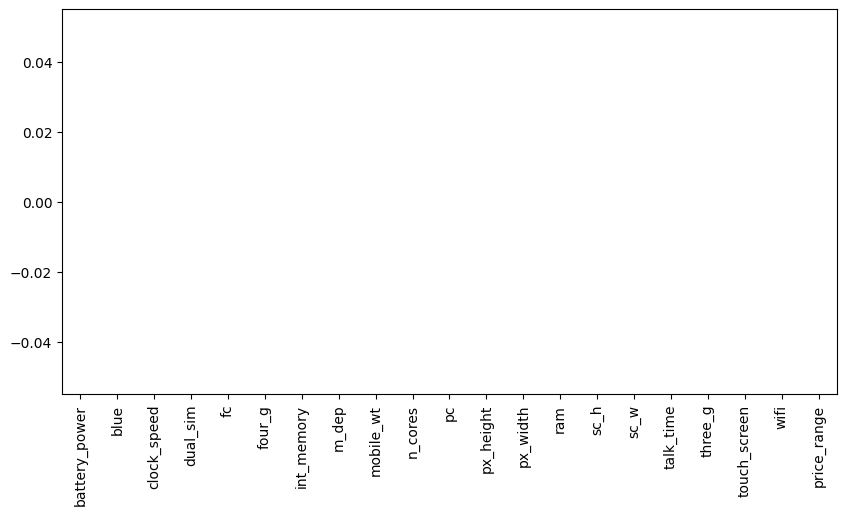

In [11]:
# Visualizing the missing values
plt.rcParams['figure.figsize'] = (10,5)
mobile_df.isnull().sum().plot(kind='bar')             #Creating Bar chart

### What did you know about your dataset?

* The dataset contains 21 columns and 2000 rows

* 19 columns have int data type and 2 columns have float data type

* No duplicate values present in the dataset.

* No missing values present in the dataset.

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
mobile_df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [13]:
# Dataset Describe
mobile_df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


From above Describe method we observe that **px_height** (pixel Resolution height) and **sc_w** (screen width) columns have minimum value 0 which is not possible for any mobile. So we will treat these in data wrangling section.

### Variables Description

**Variables Description -**

**1.	Battery_power** - Total energy a battery can store in one time measured in mAh

**2.	Blue** - Has bluetooth or not

**3.	Clock_speed** - speed at which microprocessor executes instructions

**4.	Dual_sim** - Has dual sim support or not

**5.	Fc** - Front Camera megapixels

**6.	Four_g** - Has 4G or not

**7.	Int_memory** - Internal Memory in Gigabytes

**8.	M_dep** - Mobile Depth in cm

**9.	Mobile_wt** - Weight of mobile phone

**10.	N_cores** - Number of cores of processor

**11.	Pc** - primary camera megapixels

**12.	Px_height** - Pixel Resolution Height

**13.	Px_width** - Pixel Resolution Width

**14.	Ram** - Random Access Memory in Megabytes

**15.	Sc_h** - Screen Height of mobile in cm

**16.	Sc_w** - Screen Width of mobile in cm

**17.	Talk_time** - longest time that a single battery charge will last

**18.	Three_g** - Has 3G or not

**19.	Touch_screen** - Has touch screen or not

**20.	Wifi** - Has wifi or not

**21.	Price_range** - price ranges of mobiles .This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
print(mobile_df.nunique())
for i in mobile_df.columns:
    unique_values = mobile_df[i].unique()
    print('_'*140)
    print(f"Unique values for {i} are: {unique_values}")

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64
____________________________________________________________________________________________________________________________________________
Unique values for battery_power are: [ 842 1021  563 ... 1139 1467  858]
____________________________________________________________________________________________________________________________________________
Unique values for blue are: [0 1]
________________________________________________________________________________________________________________________________________

## 3. ***Data Wrangling***

### Data Wrangling Code

From the Describe method we observed that px_height (pixel Resolution height) and sc_w (screen width) columns have minimum value 0 which is not possible for any mobile.

In [15]:
# Write your code to make your dataset analysis ready.
print("zero values in px_height column=",sum(mobile_df.px_height==0))        # checking for zero values in px_height column
print("zero values in sc_w column=",sum(mobile_df.sc_w==0))                  # checking for zero values in sc_w column


zero values in px_height column= 2
zero values in sc_w column= 180


In [16]:
# Replacing zero value data with mean value

mobile_df['px_height'].replace(to_replace = 0, value = int(mobile_df.px_height.mean()), inplace = True)
mobile_df['sc_w'].replace(to_replace = 0,value = int(mobile_df.sc_w.mean()), inplace = True)

In [17]:
# Rechecking for zero values
print("zero values in px_height column=",sum(mobile_df.px_height==0))
print("zero values in sc_w column=",sum(mobile_df.sc_w==0))

zero values in px_height column= 0
zero values in sc_w column= 0


In [18]:
#Lists of numerical and categorical categories are being created.
numerical_columns=[]
categorical_columns=[]

# using for loop and if condition for seperating features according to unique count
for col in mobile_df.columns:
  if mobile_df[col].nunique()>5:
    numerical_columns.append(col)
  else:
    categorical_columns.append(col)
print(numerical_columns)
print(categorical_columns)

['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']
['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']


In [19]:
mobile_df[categorical_columns]        # Data in categorical_columns

,blue,dual_sim,four_g,three_g,touch_screen,wifi,price_range
0,0,0,0,0,0,1,1
1,1,1,1,1,1,0,2
2,1,1,1,1,1,0,2
3,1,0,0,1,0,0,2
4,1,0,1,1,1,0,1
...,...,...,...,...,...,...,...
1995,1,1,1,1,1,0,0
1996,1,1,0,1,1,1,2
1997,0,1,1,1,1,0,3
1998,0,0,1,1,1,1,0


In [20]:
mobile_df[numerical_columns]          # Data in numerical_columns

,battery_power,clock_speed,fc,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time
0,842,2.2,1,7,0.6,188,2,2,20,756,2549,9,7,19
1,1021,0.5,0,53,0.7,136,3,6,905,1988,2631,17,3,7
2,563,0.5,2,41,0.9,145,5,6,1263,1716,2603,11,2,9
3,615,2.5,0,10,0.8,131,6,9,1216,1786,2769,16,8,11
4,1821,1.2,13,44,0.6,141,2,14,1208,1212,1411,8,2,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,0.8,106,6,14,1222,1890,668,13,4,19
1996,1965,2.6,0,39,0.2,187,4,3,915,1965,2032,11,10,16
1997,1911,0.9,1,36,0.7,108,8,3,868,1632,3057,9,1,5
1998,1512,0.9,4,46,0.1,145,5,5,336,670,869,18,10,19


In [21]:
# Mobile phones groupby 3g support and 4g
mobile_df.groupby('three_g')['four_g'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False)

,three_g,four_g,Count
1,1,1,1043
2,1,0,480
0,0,0,477


### What all manipulations have you done and insights you found?


* The minimum value of px_height and sc_w should not be 0 as it does not make sense for a phone screen width or pixel height to be 0. So the 0 values are replaced with the mean values.
* We create two groups numerical_columns and categorical_columns. columns having unique values greater then five are considered as numerical columns and columns having unique values less then 5 were considered as categorical columns.
* Large number of mobiles support 4G technology. Mobile which support 4G that also support 3G.
* There are small numbers of devices that don't support neither 4G nor 3G.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### **Chart - 1 Categorical Data Exploration: Univariate Visualization**

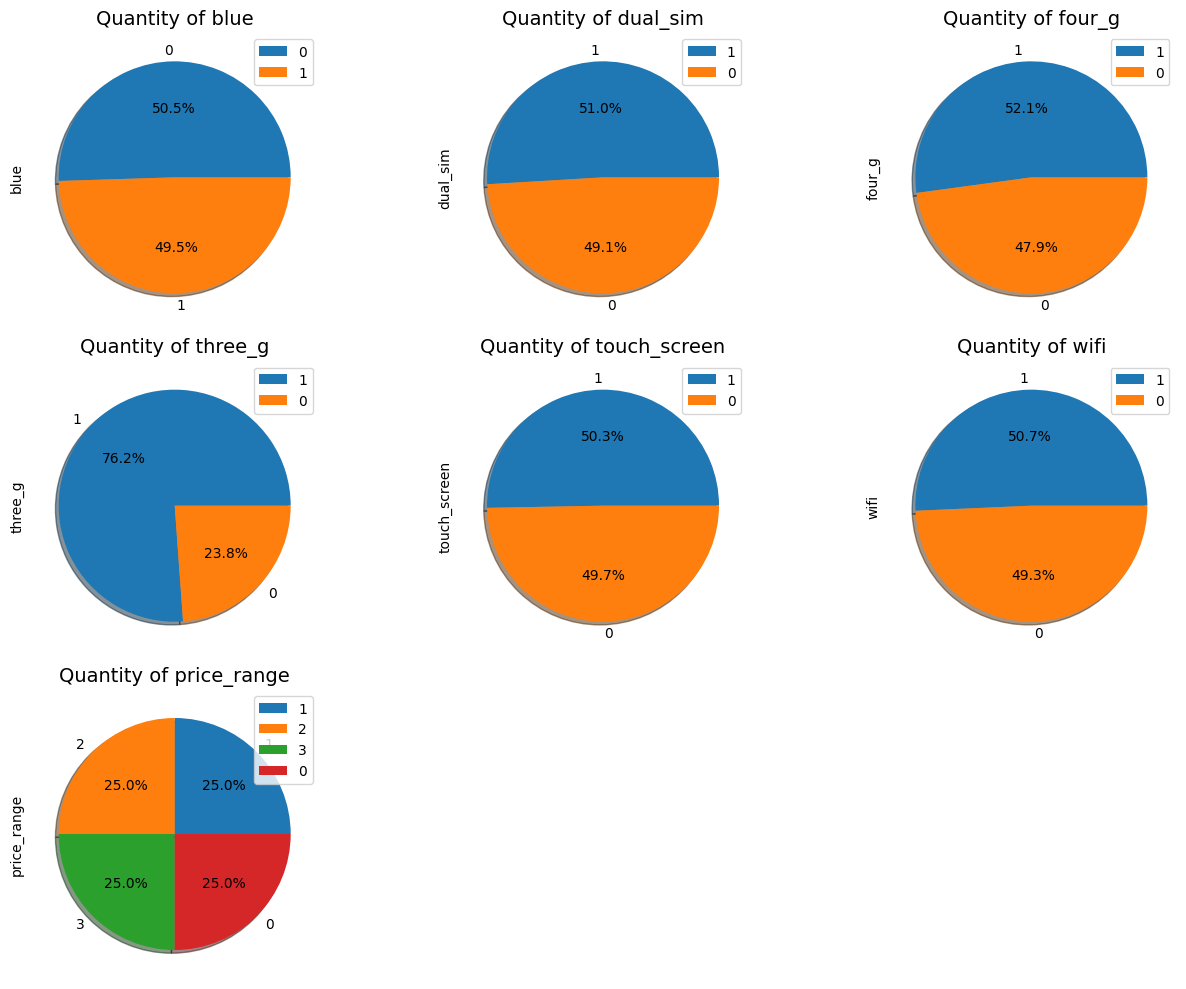

In [22]:
# Chart - 1 visualization code

count = 1
for var in categorical_columns:
    plt.subplot(3, 3, count)
    mobile_df[var].value_counts().plot.pie(autopct='%1.1f%%', figsize=(13, 10),shadow=True, legend=True)
    plt.title(f'Quantity of {var}', fontsize=14)
    count += 1

plt.tight_layout()
plt.show()


##### **1. Why did you pick the specific chart?**

Pie charts are used when the variable has a limited number of categories, and the goal is to show the proportion or percentage of observations that belong to each category. Pie charts are particularly useful when the number of categories is small, typically between 2 and 6, as they provide an easy-to-read representation of the distribution of the data.

##### **2. What is/are the insight(s) found from the chart?**

By above observation we get to know that features above have almost equal weightage of percentage except 3G. 76% mobile supports 3G because every phone that support 4G also support 3G network. Touchscreen and keypad both phones have almost equal craze. All 4 price range have equals ratio of 25%.


##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The insights gained from analyzing binary categorical variables such as Bluetooth, dual SIM support, 4G connectivity, and Wi-Fi can have a positive impact on business growth. These features are in demand among customers and can be used to attract and target specific customer segments.

#### **Chart - 2 Battery Power Comparison between 3G and 4G Network**
#### **Bivariate Analysis (Numerical - Categorical)**

   three_g  four_g  Count
1        1       1   1043
2        1       0    480
0        0       0    477


<Axes: xlabel='non_3g', ylabel='battery_power'>

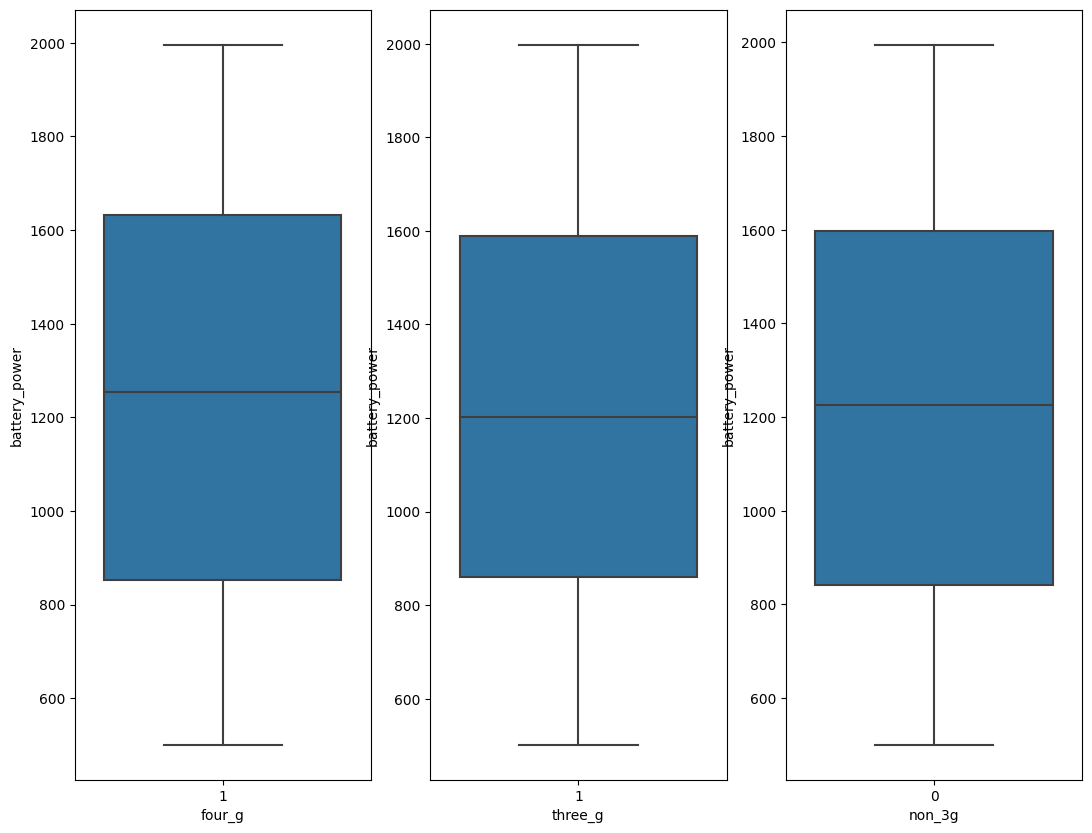

In [23]:
# Chart - 2 visualization code

# Mobile phones Network Support 3G and 4g count
print(mobile_df.groupby('three_g')['four_g'].value_counts().reset_index(name="Count").sort_values(["Count"],ascending=False))

# mobile which support 3G and 4G
four_G_mobiles = mobile_df[mobile_df['four_g'] == 1][['four_g', 'battery_power']]

# mobile which support only 3G not 4G
condition = (mobile_df['three_g'] == 1) & (mobile_df['four_g'] == 0)
three_G_mobiles = mobile_df.loc[condition, ['three_g', 'battery_power']]

# mobile which doesn't support 3G or 4G
non_3g_mobiles =mobile_df[mobile_df['three_g'] == 0][['three_g', 'battery_power']]
non_3g_mobiles.rename(columns={'three_g': 'non_3g'}, inplace=True)

# visualizing boxplot chart
plt.figure(figsize=(13, 10))

plt.subplot(1, 3, 1)                                                         # First subplot for 4G mobiles
sns.boxplot(x="four_g", y="battery_power", data=four_G_mobiles)

plt.subplot(1, 3, 2)                                                         # Second subplot for 3G only mobiles
sns.boxplot(x="three_g", y="battery_power", data=three_G_mobiles)

plt.subplot(1, 3, 3)                                                         # Third subplot for Non-3G mobiles
sns.boxplot(x="non_3g", y="battery_power", data=non_3g_mobiles)

##### **1. Why did you pick the specific chart?**

Boxplot is very suitable for  this kind of bivariate problem where numerical data have huge quantity.By comparing the distribution of a variable across different categories or groups (like comparing battery power for different network technologies), box plots allow you to do this efficiently by showing the distributions side by side.

##### **2. What is/are the insight(s) found from the chart?**

All three types of chart shows almost equal area on graph.it indicates that the spread of battery power within each network type is roughly the same. This suggests that there isn't a significant difference in battery power distribution between the network types.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Findings indicate that network technology has minimal impact on battery power, We could use this information in our marketing materials to highlight the benefits of your devices. Promoting that our devices provide good battery life across different network types could attract customers.

#### **Chart - 3 Visualizing Battery power and Price Variations**
**Bivariate Analysis (Numerical - Categorical)**

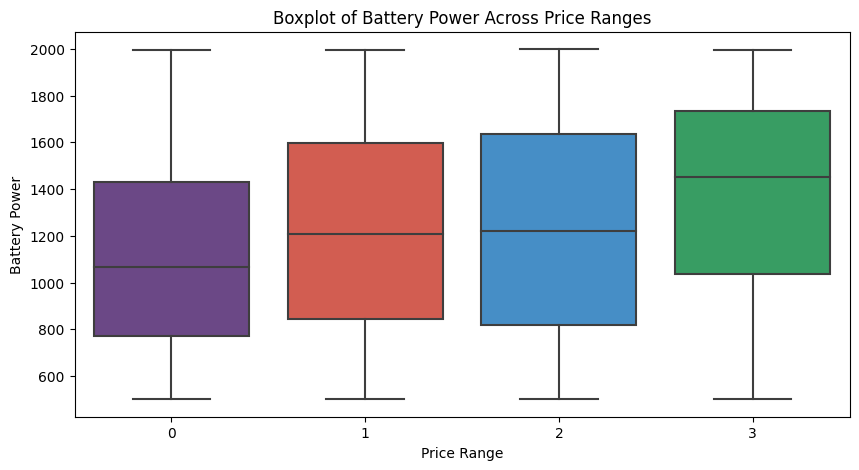

In [24]:
# Chart - 3 visualization code

# colors palette for some shining dark colors in this graph
custom_palette = ["#6C3E90", "#E74C3C", "#3191DB", "#27AE60"]

# creating box plot for visualizing battery power among different price range
ax = sns.boxplot(x="price_range", y="battery_power", data=mobile_df, palette=custom_palette)

# Add title and labels
ax.set_title("Boxplot of Battery Power Across Price Ranges")
ax.set_xlabel("Price Range")
ax.set_ylabel("Battery Power")

# Show the plot
plt.show()


##### **1. Why did you pick the specific chart?**

Box plots provide a clear comparison of the distribution of battery power across different price ranges. Each box represents the interquartile range (IQR) of the battery power within a specific price range, making it easy to compare the central tendency and spread of battery power among different price groups.

##### **2. What is/are the insight(s) found from the chart?**

The chart shows that there is a positive correlation between battery power and price range. This means that as the battery power increases the price range also goes up. The chart also shows that there is some variation in battery power within each price range, but the variation is smaller for higher price ranges. The chart suggests that battery power is an important factor that affects the price of a mobile device.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The gained insights may help creating a positive business impact if we use them to make informed decisions about product. For example

* How can we optimize the battery power of device to meet the needs and preferences of target market?
* How can we differentiate our device from your competitors based on battery power and other features?

There are no insights that lead to negative growth by themselves, but there may be some challenges like:-
* How does the battery power of device affect its cost, weight, and size?
* How does the battery power of device affect its safety, security, and reliability?

#### **Chart - 4 Comparison of Primary vs. Front Camera Megapixels**
**Bivariate Analysis (Numerical - Numerical)**

Text(0.5, 0, 'MegaPixels')

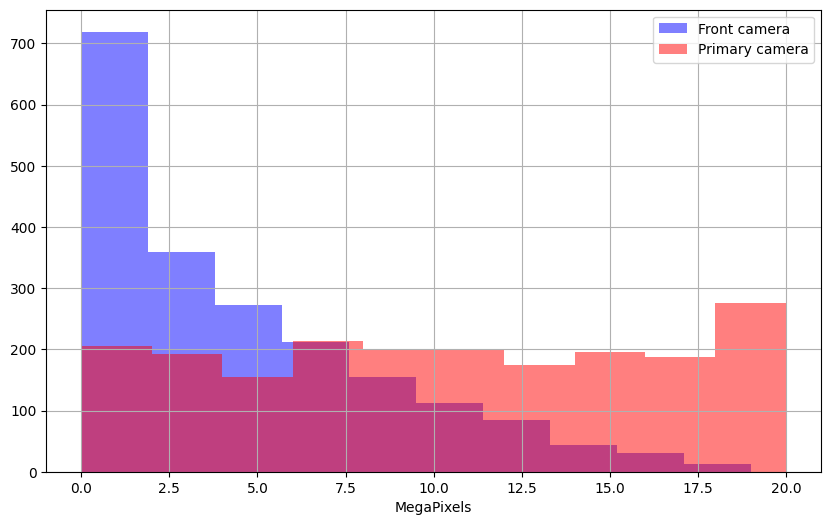

In [25]:
# Chart - 4 visualization code
plt.figure(figsize=(10,6))
mobile_df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
mobile_df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

##### **1. Why did you pick the specific chart?**

Histogram is a type of graph that shows the distribution of numerical data by using bars of different heights. It is useful for this graph because it shows how many phones have a certain number of megapixels in the primary and front camera. We can compare the blue and red bars to see which camera has more or less megapixels in different ranges. For example, we can see that most phones have low megapixels in the front camera and high megapixels in the primary camera.



##### **2. What is/are the insight(s) found from the chart?**

* There is a large variation in the number of megapixels in the primary camera, ranging from 0.0 to 20.0, while the front camera has a smaller variation, ranging from 0.0 to 19.
* There is a negative correlation between the number of megapixels in the primary and front camera, meaning that phones with higher megapixels in the primary camera tend to have lower megapixels in the front camera, and vice versa.

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The gained insights may help creating a positive business impact if they are used to identify the market demand and preferences for different camera qualities and features. For example, if a company is planning to launch a new smartphone, they can use this information to decide on the specifications of the front and primary cameras. Additionally, businesses can also use this information to identify potential gaps in the market and develop products that fullfill consumer needs.

#### **Chart - 5 Comparison of Price Ranges for Phones with and without 4G Capabilitie**
**Bivariate Analysis (Categorical - Categorical)**


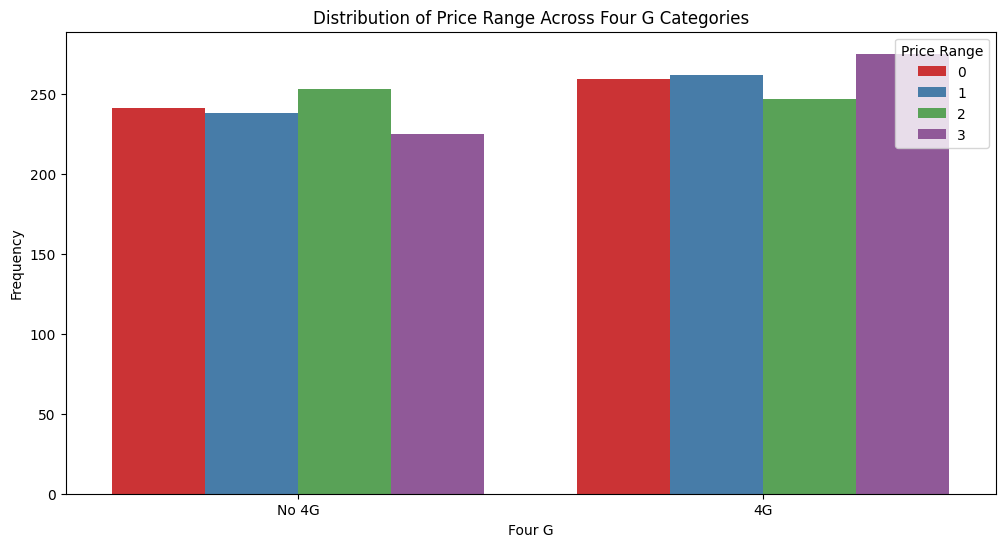

In [26]:
# Mapping for legend labels
legend_mapping = {0: "No 4G", 1: "4G"}

# Create the bar plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=mobile_df, x="four_g", hue="price_range", palette="Set1")

# Set title and labels
plt.title("Distribution of Price Range Across Four G Categories")
plt.xlabel("Four G")
plt.ylabel("Frequency")
plt.xticks(ticks=[0, 1], labels=["No 4G", "4G"])
ax.legend(title="Price Range", labels=[i for i in range(4)], loc="upper right")

plt.show()


##### **1. Why did you pick the specific chart?**

we use countplot chart it is a good choice as we want to show the counts of observations in each categorical bin using bars. Using a countplot chart to visualize the distribution of price ranges and 4G capabilities can help to understand the market trends

##### **2. What is/are the insight(s) found from the chart?**

* From the chart above we can see that the frequency of different price ranges for phones with and without 4G capabilities is different. The bars for “4G” are all taller than the bars for “No 4G”, indicating that there are more phones with 4G capabilities in each price range.

* On the other hand, the bars for “No 4G” are all roughly the same height, with the red and green bars being slightly taller than the blue and purple bars.




##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The gained insights can help businesses to make informed decisions when it comes to marketing and selling phones with and without 4G capabilities. For example, businesses can use the information about the distribution of price ranges for phones with and without 4G capabilities to adjust their pricing strategies and target specific market segments.

As for negative growth, the chart does not provide any specific insights that would lead to negative growth. It is important for businesses to use the insights gained from this chart in conjunction with other information and data to make informed decisions that will have a positive impact on their growth.

#### **Chart - 6 RAM vs. Price Range: A Scatter Plot Analysis**
**Bivariate Analysis (Numerical - Categorical)**

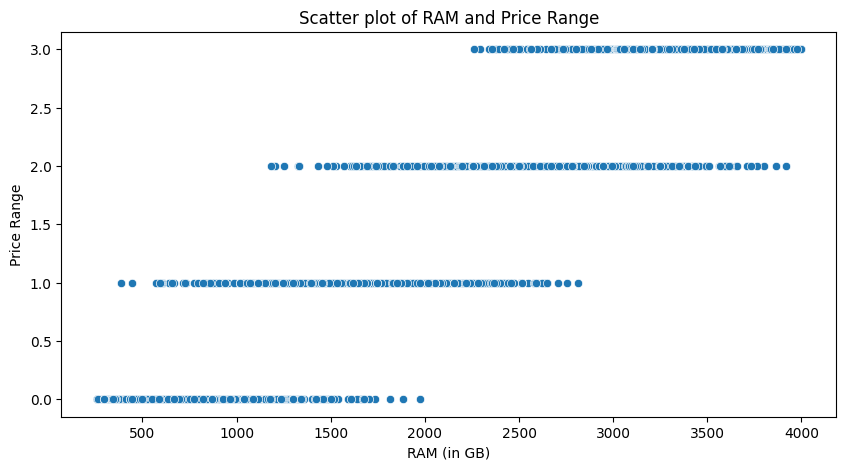

In [71]:
# Chart - 6 visualization code
sns.scatterplot(x='ram', y='price_range', data=mobile_df)
plt.title('Scatter plot of RAM and Price Range')
plt.xlabel('RAM (in GB)')
plt.ylabel('Price Range')
plt.show()

##### **1. Why did you pick the specific chart?**

Scatter plots are a powerful tool for visualizing the relationship between two variables and it represents individual data points as dots on a graph, making it easier to visualize the distribution and spread of the data. This can be helpful in identifying outliers or clusters within the data set. We are particularly using it for exploring the relationship between Ram and Price Range.

By examining the pattern of the data points in a scatterplot, we can gain valuable insights into the relationship between the two variables and identify trends, patterns, or outliers that may be important for understanding the business.

##### **2. What is/are the insight(s) found from the chart?**

From the above scatter plot we can see that there is a slight increase in price range as RAM increases. The data points are spread out horizontally, with most of the points clustered in the lower price ranges. This suggests that there is a positive correlation between RAM and price range, meaning that phones with higher RAM tend to be in higher price ranges.


##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

The insights gained can help businesses make informed decisions when it comes to marketing and selling phones with different RAM capacities. For example, businesses can use the information about the relationship between RAM and price range to adjust their pricing strategies and target specific market segments.

As for negative growth, the scatter plot does not provide any specific insights that would lead to negative growth. It is important for businesses to use the insights gained from this scatter plot in conjunction with other information and data to make informed decisions that will have a positive impact on their growth.

#### **Chart - 7 Talk Time Trends in Different Price Categories**
**Bivariate Analysis (Numerical - Categorical)**

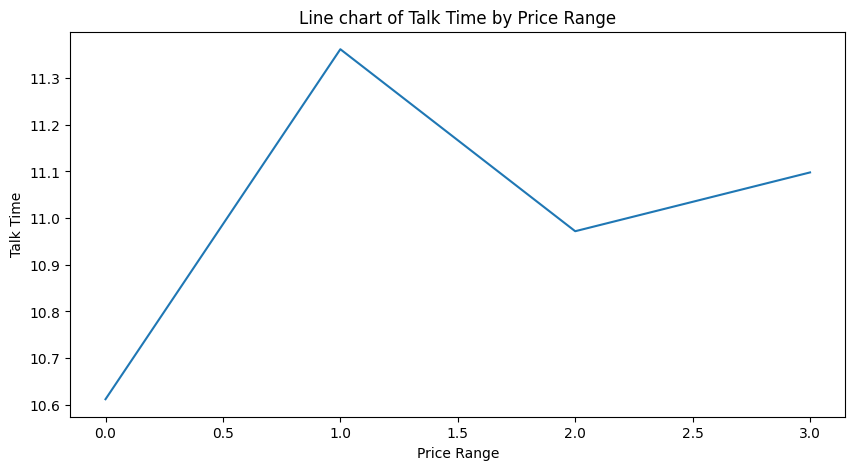

In [28]:
# Chart - 7 visualization code
talk_time = mobile_df.groupby('price_range')['talk_time'].mean()
plt.plot(talk_time.index, talk_time)
plt.title('Line chart of Talk Time by Price Range')
plt.xlabel('Price Range')
plt.ylabel('Talk Time')
plt.show()


##### **1. Why did you pick the specific chart?**

Answer Here.

##### **2. What is/are the insight(s) found from the chart?**

Answer Here

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Answer Here

#### **Chart - 8 Relationship between Clock Speed and Number of Cores**
**Bivariate Analysis (Numerical - Numerical)**

Text(0, 0.5, 'clock_speed')

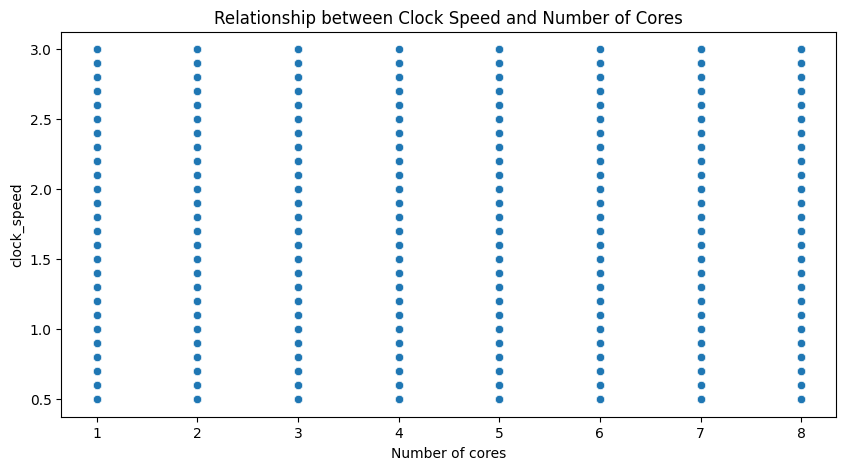

In [77]:
# Chart - 8 visualization code
sns.scatterplot(x = 'n_cores',y = 'clock_speed',data = mobile_df)
plt.title('Relationship between Clock Speed and Number of Cores')
plt.xlabel('Number of cores')
plt.ylabel('clock_speed')

##### **1. Why did you pick the specific chart?**

Answer Here.

##### **2. What is/are the insight(s) found from the chart?**

Answer Here

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Answer Here

#### Chart - 9

In [30]:
# Chart - 9 visualization code

##### **1. Why did you pick the specific chart?**

Answer Here.

##### **2. What is/are the insight(s) found from the chart?**

Answer Here

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Answer Here

#### Chart - 10

In [31]:
# Chart - 10 visualization code

##### **1. Why did you pick the specific chart?**

Answer Here.

##### **2. What is/are the insight(s) found from the chart?**

Answer Here

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Answer Here

#### Chart - 11

In [32]:
# Chart - 11 visualization code

##### **1. Why did you pick the specific chart?**

Answer Here.

##### **2. What is/are the insight(s) found from the chart?**

Answer Here

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Answer Here

#### Chart - 12

In [33]:
# Chart - 12 visualization code

##### **1. Why did you pick the specific chart?**

Answer Here.

##### **2. What is/are the insight(s) found from the chart?**

Answer Here

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Answer Here

#### Chart - 13

In [34]:
# Chart - 13 visualization code

##### **1. Why did you pick the specific chart?**

Answer Here.

##### **2. What is/are the insight(s) found from the chart?**

Answer Here

##### **3. Will the gained insights help creating a positive business impact?**
**Are there any insights that lead to negative growth? Justify with specific reason.**

Answer Here

#### Chart - 14 - Correlation Heatmap

In [35]:
# Correlation Heatmap visualization code

##### **1. Why did you pick the specific chart?**

Answer Here.

##### **2. What is/are the insight(s) found from the chart?**

Answer Here

#### Chart - 15 - Pair Plot

In [36]:
# Pair Plot visualization code

##### **1. Why did you pick the specific chart?**

Answer Here.

##### **2. What is/are the insight(s) found from the chart?**

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [37]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [38]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [39]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [40]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [41]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [42]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [43]:
# Expand Contraction

#### 2. Lower Casing

In [44]:
# Lower Casing

#### 3. Removing Punctuations

In [45]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [46]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [47]:
# Remove Stopwords

In [48]:
# Remove White spaces

#### 6. Rephrase Text

In [49]:
# Rephrase Text

#### 7. Tokenization

In [50]:
# Tokenization

#### 8. Text Normalization

In [51]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [52]:
# POS Taging

#### 10. Text Vectorization

In [53]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [54]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [55]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [56]:
# Transform Your data

### 6. Data Scaling

In [57]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [58]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [59]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [60]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [61]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [62]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [63]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [64]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [65]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [66]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [67]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [68]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [69]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [70]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***